# Machine Learning Project

# Assignment: Perform the following analyses on gum_disease_data.txt 
## The features will be the bacterial species abundances and the classifier will be status. 

## (1) Run a Decision Tree classifier.
## (2) Run a Support Vector Machine analysis.
## The next item is not graded ->
## (3) NOT GRADED (for fun): Tensor flow neural network.

Helpful sites for Decision Tree code:
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
Plotting the decision trees:
https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn

(Some Random Forest code in case you are interested: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

For Support Vector Machine help see the HA3-checkpoint jupyter notebook or python script.

For Tensor Flow support (using Iris dataset):
https://www.kaggle.com/richbrosius/iris-classification-using-tensorflow


## Data manipulation and plotting libraries

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score

## Decision Tree libraries

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## SVM Libraries

In [152]:
from sklearn import svm
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

## Read in data set

In [125]:
##DO NOT CHANGE THIS LINE OF CODE
df=pd.read_csv('gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
df.head()

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


## Training set for all analyses

In [153]:
X = df.iloc[:,1:6]
target = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, target,
                                                   test_size = 0.33, random_state = 100)

In [154]:
# X defines the bacteria abundances and target is the classifier used in the training set.

## Part 1

## Decision Tree Analysis

## Generate Decision Tree

In [155]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [47]:
# Both the bacterial abundances and status are used to train the model, then the classifier predicts on the bacterial abundance test data.

## Show gini prediction

In [156]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100)
clf_gini.fit(X_train, y_train)
impurities = clf_gini.tree_.impurity
n_samples = clf_gini.tree_.n_node_samples
gini_impurity = impurities * (n_samples / np.sum(n_samples))

print("Node\tGini Impurity")
for node, impurity in enumerate(gini_impurity):
    print(f"{node}\t{impurity}")

Node	Gini Impurity
0	0.2287326388888889
1	0.0
2	0.0


In [50]:
# The code above utilizes the gini method of determining when a randomly selected label would be wrong if labeled stochastically.

## Print accuracy

In [157]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = ", accuracy)

Accuracy =  1.0


## Create dot file of Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [158]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)
class_names = [str(c) for c in clf.classes_]

In [159]:
export_graphviz(clf, out_file="decision_tree.dot", feature_names=X.columns, class_names=class_names, filled=True)

In [49]:
# Code above outputs the decision tree results into a string to be concatinated and exported as a .dot file. 

## Part 2

## Support Vector Machine

## Visualize the first 5 rows of the dataset

In [160]:
df=pd.read_csv('gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
df[:5]

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


## View pairwise plots of all bacteria features (strep, prev, lepto, fuso, veil) to find best combination of dimensions (clearest separation between class 0 and 1)

/Users/ryinrouzbehani/opt/anaconda3/envs/biopython_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ryinrouzbehani/opt/anaconda3/envs/biopython_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ryinrouzbehani/opt/anaconda3/envs/biopython_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ryinrouzbehani/opt/anaconda3/envs/

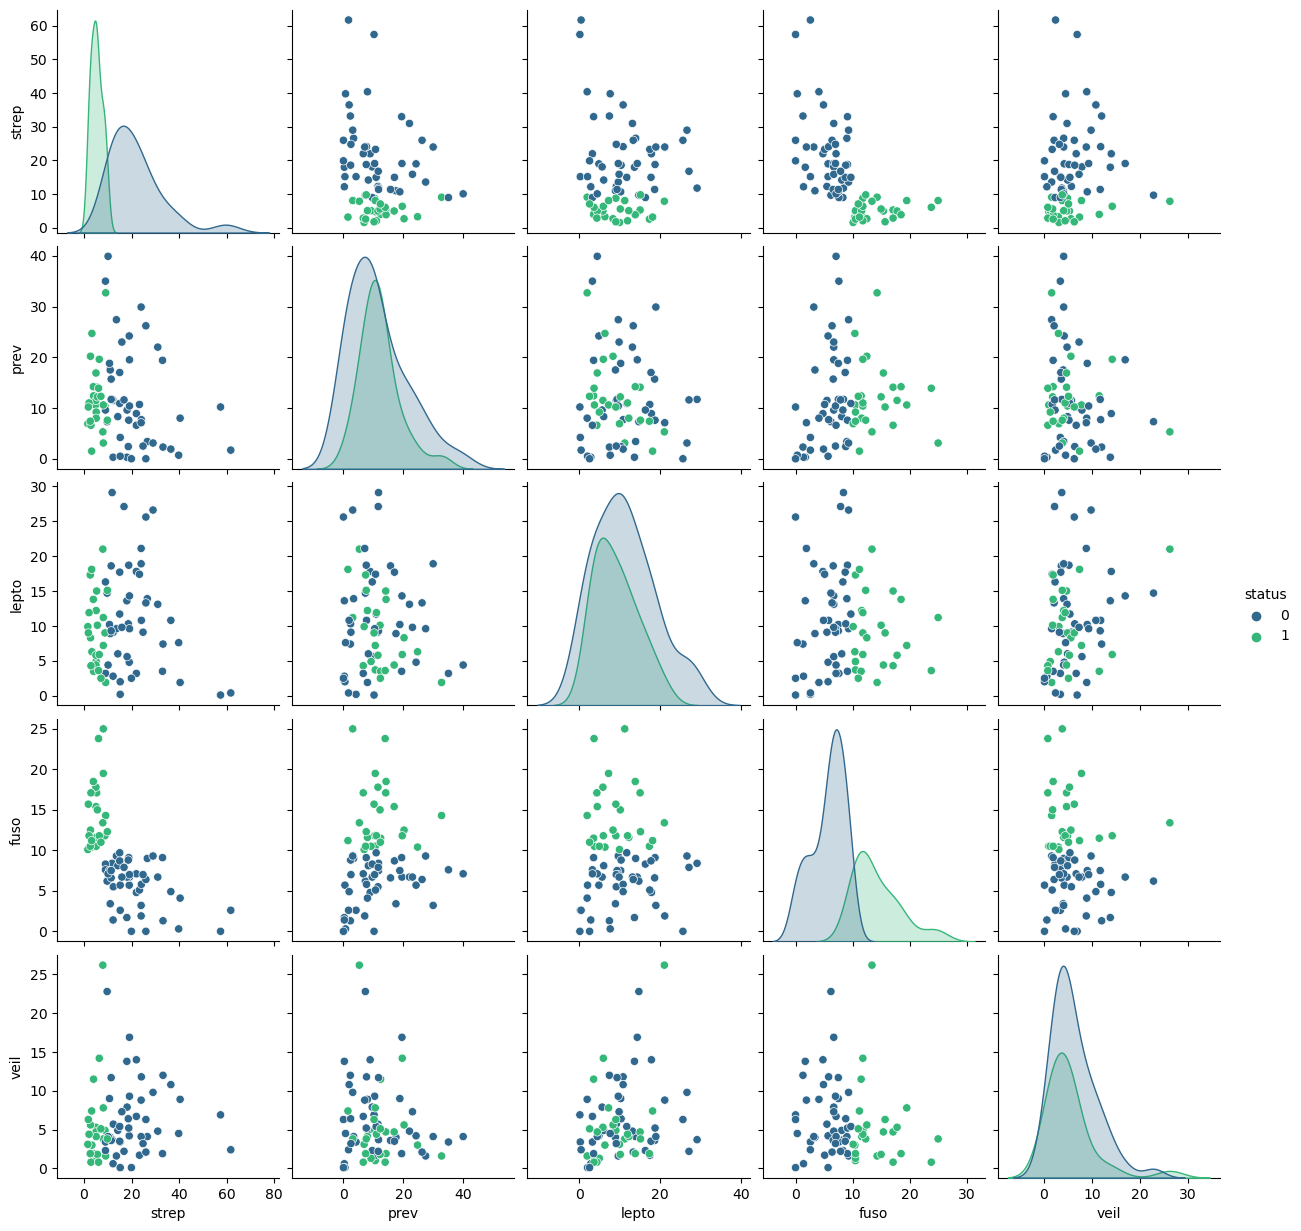

In [134]:
bac_features = ['strep', 'prev', 'lepto', 'fuso', 'veil']
sns.pairplot(df, hue='status', vars=bac_features, palette='viridis')
plt.show()

In [51]:
# Based on the pairwise plots, fuso and strep appear to show the clearest separation whne view status.

## Make the training and testing arrays

In [161]:
X = df[['strep', 'fuso']].values
target_1 = df['status'].values

X_train, X_test, y_train, y_test = train_test_split(X, target_1, test_size=0.33, random_state=100)

In [52]:
# The bacterial abundances of fuso and strep along with status are used to train and test the non-linear SVM classifier.

# Part A) Non-linear SVM Classifier

## Train the SVM model

In [162]:
clf_svm = SVC(kernel='rbf', random_state=100)
clf_svm.fit(X_train, y_train)

SVC(random_state=100)

## SVM model predictions on the test data

In [163]:
predicted = clf_svm.predict(X_test)

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

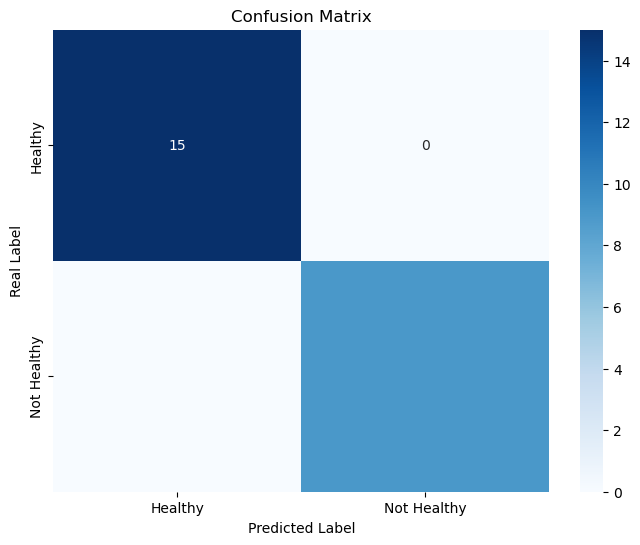

In [164]:
labels = ["Healthy", "Not Healthy"]

cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Real Label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# The code above produces a confusion matrix plot which is used to determine false positive and false negative outcomes 
# used to further interpret the classifiers performance.

## Show Decision Boundary Plot

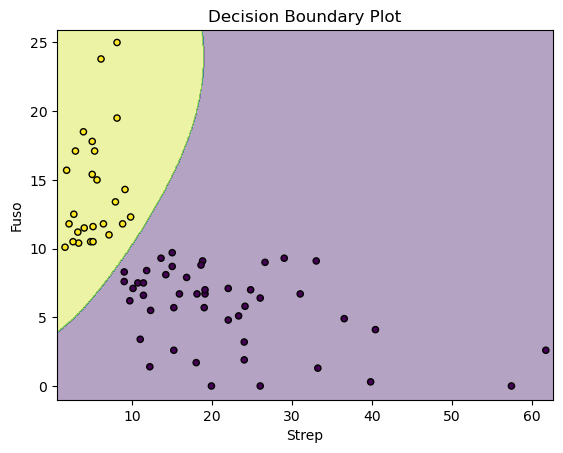

In [165]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=target, s=20, edgecolor='k')
plt.xlabel('Strep')
plt.ylabel('Fuso')
plt.title('Decision Boundary Plot')
plt.show()

In [56]:
# Within decision boundary plot code, the meshgrid is used to define the area of the plot
# the non-linear model is used to predict the points on the plot which is the subsequently used to graph the decision boundary plot.

# Part B) Linear SVM Classifier

## Train the linear classifier

In [166]:
clf_log = linear_model.LogisticRegression()
clf_log.fit(X_train, y_train)
y_pred = clf_log.predict(X_test)

In [147]:
# The linear classifier (LogisticRegression) is trained on the fuso/strep features and status, then the classifier is used to predict
# on the bacterial abundance (fuso/strep) test data.

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

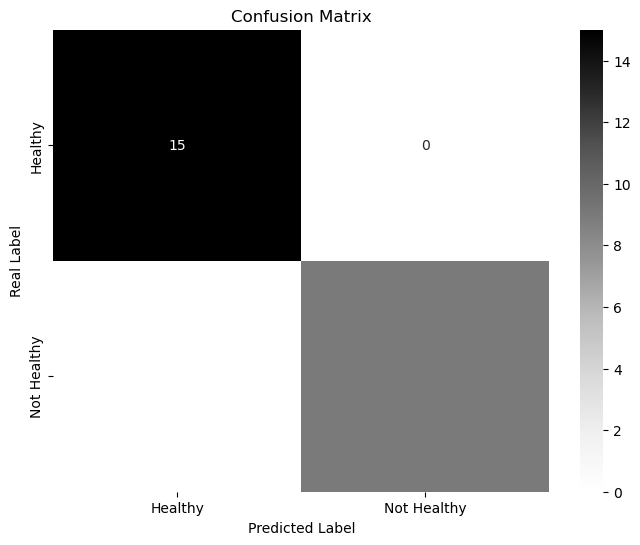

In [167]:
labels = ["Healthy", "Not Healthy"]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Real Label')
plt.title('Confusion Matrix')
plt.show()

In [144]:
# Similarly to the non-linear SVM confusion matrix, this matrix shows that the classifiers performance has remained the same.

## Show Precision and Recall scores

In [168]:
precision_score = precision_score(y_test, y_pred, average=None)
recall_score = recall_score(y_test, y_pred, average=None)

print("Precision =", precision_score)
print("Recall =", recall_score)

Precision = [1. 1.]
Recall = [1. 1.]


In [169]:
# The code above examines the trained and tested bacterial abundance data to obtain precision and recall scores.
# The precision and recall scores for the classifier show that the data labelled actually belonged to what it was designated as.

## Show Decision Boundary Plot

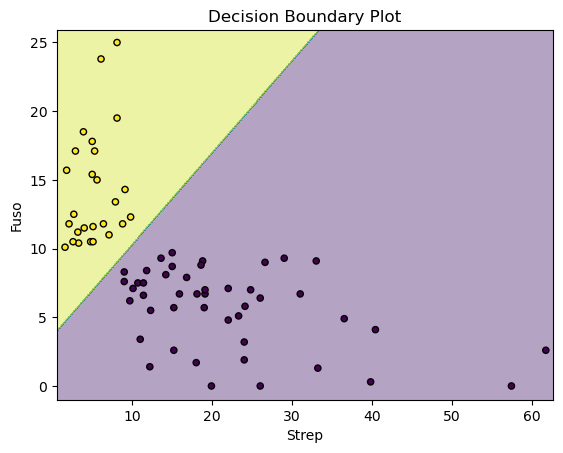

In [143]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf_log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=target, s=20, edgecolor='k')
plt.xlabel('Strep')
plt.ylabel('Fuso')
plt.title('Decision Boundary Plot')
plt.show()

In [170]:
# The decision boundary plot above shows the distinct linear separation between fuso and strep,
# characteristic of LogisticRegression classifier, further evaluating the effectivness of the classifier.

# Part C) Neural Network extra credit